In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [64]:
sf = pd.read_pickle('sf_transformed2.pkl')

In [69]:
sf.iloc[:,-1].value_counts()

True    43026
Name: search_conducted, dtype: int64

In [60]:
sf.shape

(43026, 6)

In [12]:
x = sf.subject_age.astype('int64')

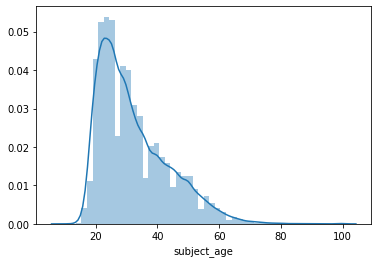

In [14]:
sns.distplot(x,bins=50)

In [16]:
sf['age_bin_round'] = np.array(np.floor(np.array(sf.subject_age.astype('int64')) / 10))

In [22]:
bin_ranges = [0, 18, 35, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

In [34]:
sf['age_bin_custom_range'] = pd.cut(np.array(sf['subject_age'].astype('int64')),bins=bin_ranges)
sf['age_bin_custom_label'] = pd.cut(np.array(sf['subject_age'].astype('int64')),bins=bin_ranges,labels=bin_names)

In [35]:
sf.subject_age = sf.age_bin_custom_label

In [36]:
sf.subject_age.value_counts()

2    28260
3     7438
4     5264
1     1222
5      755
6       87
Name: subject_age, dtype: int64

In [46]:
features = sf.drop(columns='search_conducted')
X = features
y = sf.search_conducted
y = y.astype('bool')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [54]:
log_reg = LogisticRegression(penalty='l1',random_state=42,solver='liblinear',max_iter=1000)
y_test.value_counts()

# print("Logistic Regression Classifier Score:")
# print("Training: {:6.2f}%".format(100*log_reg.score(X_train, y_train)))
# print("Test set: {:6.2f}%".format(100*log_reg.score(X_test, y_test)))
# print("F1: {:6.2f}%".format(f1_score(y, log_reg.predict(X), average='weighted')))

True    21513
Name: search_conducted, dtype: int64

True    43026
Name: search_conducted, dtype: int64